# Manual K-means Algorithm
This project is intended to replicate the K-means algorithm without using a sklearn, tensorflow or keras library. Therefore, I recommend to go through the theory of this algorithm first. I you already know it, lets get to work then! 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('fake_bills.csv', sep=";")
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [164]:
df_filled = df.fillna(df.median())
X = df_filled.iloc[:,1:].values
Y = df_filled.iloc[:,0].values

print(X)

[[171.81 104.86 104.95   4.52   2.89 112.83]
 [171.46 103.36 103.66   3.77   2.99 113.09]
 [172.69 104.48 103.5    4.4    2.94 113.16]
 ...
 [171.8  104.01 104.12   5.51   3.36 111.95]
 [172.06 104.28 104.06   5.17   3.46 112.25]
 [171.47 104.15 103.82   4.63   3.37 112.07]]


### A) Let's see it in a graph
In order to see the graphic, first we are going to use only 2 features.  The mean height and the mean margin.

In [166]:
mean_heights = (X[:,1]+X[:,2])/2
mean_margins = (X[:,3]+X[:,4])/2

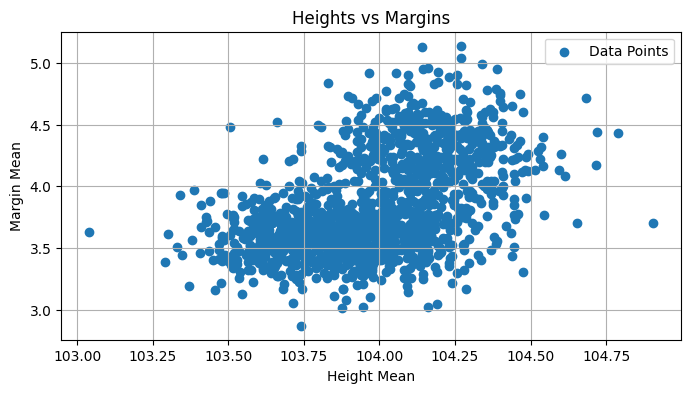

In [167]:
plt.figure(figsize=(8,4))
plt.scatter(mean_heights,mean_margins, label='Data Points')

plt.title('Heights vs Margins')
plt.xlabel('Height Mean')
plt.ylabel('Margin Mean')
plt.legend()
plt.grid(True)
plt.show()

Looking at this scatter plot I am going to create the line that I think I would use (only by looking at it) to divide both groups.

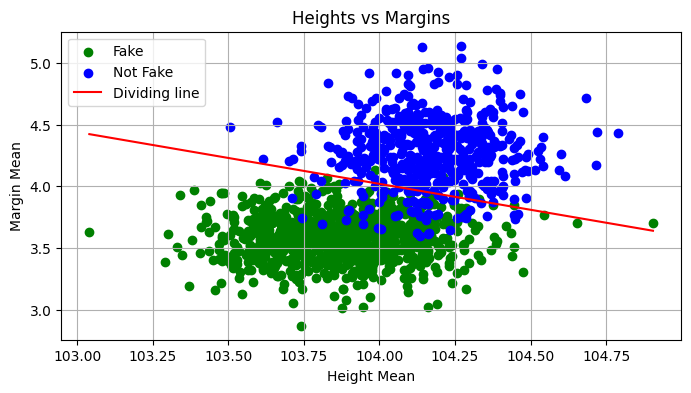

In [168]:
plt.figure(figsize=(8,4))
# Scatter plot with different colors for humans and non-humans
plt.scatter(mean_heights[Y == 1], mean_margins[Y == 1], color='green', label='Fake')
plt.scatter(mean_heights[Y == 0], mean_margins[Y == 0], color='blue', label='Not Fake')


# Create the line like to divide both groups
x_values = np.linspace(mean_heights.min(), mean_heights.max(), 100)
y_values = -0.42 * x_values + 47.7
plt.plot(x_values, y_values, 'r-', label='Dividing line')

plt.title('Heights vs Margins')
plt.xlabel('Height Mean')
plt.ylabel('Margin Mean')
plt.legend()
plt.grid(True)
plt.show()

### B) Now let's normalized it

In [169]:
def number_normalizer(number, min, max):
    return (number-min)/(max-min)

def normalizer(array):
    
    if array.ndim == 1:
        minimun = min(array)
        maximun = max(array)
        return np.array([number_normalizer(x, minimun, maximun) for x in array])
    ## elif array.ndim == 2:
        #insert code here
    else: 
        raise ValueError("El array debe ser unidimensional")
    
### We also need to add the case if it gets a 2d or more array. But let's do that later 

mean_heights_normalized = normalizer(mean_heights)
mean_margins_normalized = normalizer(mean_margins)

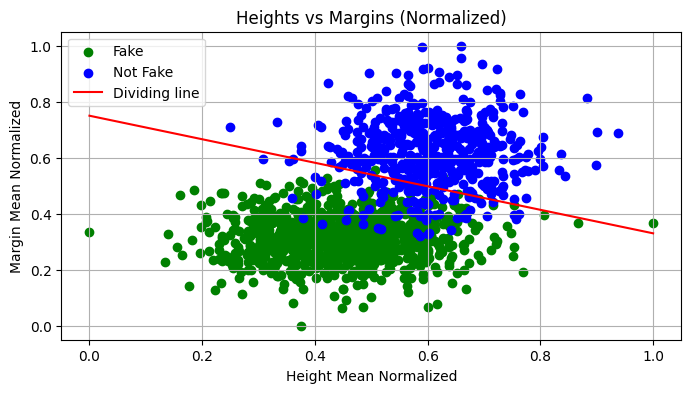

In [170]:
plt.figure(figsize=(8,4))
# Scatter plot with different colors for humans and non-humans
plt.scatter(mean_heights_normalized[Y == 1], mean_margins_normalized[Y == 1], color='green', label='Fake')
plt.scatter(mean_heights_normalized[Y == 0], mean_margins_normalized[Y == 0], color='blue', label='Not Fake')


# Create the line like to divide both groups
x_values = np.linspace(mean_heights_normalized.min(), mean_heights_normalized.max(), 100)
y_values = -0.42 * x_values + 0.75
plt.plot(x_values, y_values, 'r-', label='Dividing line')

plt.title('Heights vs Margins (Normalized)')
plt.xlabel('Height Mean Normalized')
plt.ylabel('Margin Mean Normalized')
plt.legend()
plt.grid(True)
plt.show()

### C) Now let's apply the algorithm

In [207]:
from random import randint
from math import sqrt

#Create 2 random nucleous
nucleous_1 = [randint(0,100)/100, randint(0,100)/100]
nucleous_2 = [randint(0,100)/100, randint(0,100)/100]
print("Núcleo 1:", nucleous_1)
print("Núcleo 2:", nucleous_2)

#intiailiza the lists of classification: 
prev_class = [-1, -1]
actual_class = []

def euc_distance(p1, p2): #(1,2) y (3,7)
    x_distance = p2[0]-p1[0]
    y_distance = p2[1]-p1[1]
    return sqrt(x_distance**2 + y_distance**2)

iteration = 1
while actual_class != prev_class:
    print(f'Starting iteration number: ' + str(iteration))
    prev_class = actual_class.copy() # set the actual classification to the previous one
    actual_class = [] #restart actual classification
    actual_points_1 = []
    actual_points_2 = []

    for i in range(len(mean_heights_normalized)): #run classification over every datapoint
        data_point = [mean_heights_normalized[i] , mean_margins_normalized[i]]
        dis_to_n1 = euc_distance(data_point, nucleous_1)
        dis_to_n2 = euc_distance(data_point, nucleous_2)

        if dis_to_n1 <= dis_to_n2:
            actual_class.append(1)
            actual_points_1.append(data_point)

        else: 
            actual_class.append(2)
            actual_points_2.append(data_point)

    #recaculate new nucleous
    if actual_points_1 and len(actual_points_2) > 0:
        nucleous_1 = [sum([p[0] for p in actual_points_1])/len(actual_points_1), 
                      sum([p[1] for p in actual_points_1])/len(actual_points_1)]
        
    if actual_points_2 and len(actual_points_2) > 0:
        nucleous_2 = [sum([p[0] for p in actual_points_2])/len(actual_points_2), 
                      sum([p[1] for p in actual_points_2])/len(actual_points_2)]
    #print("Núcleo 1:", nucleous_1)
    #print("Núcleo 2:", nucleous_2)

    iteration+=1

Núcleo 1: [0.36, 0.93]
Núcleo 2: [0.72, 0.26]
Starting iteration number: 1
Starting iteration number: 2
Starting iteration number: 3
Starting iteration number: 4
Starting iteration number: 5
Starting iteration number: 6
Starting iteration number: 7


I've Tried Multiple times, and usually it takes between 8 and 12 iterations, depending of the initial position of the nocleouses.

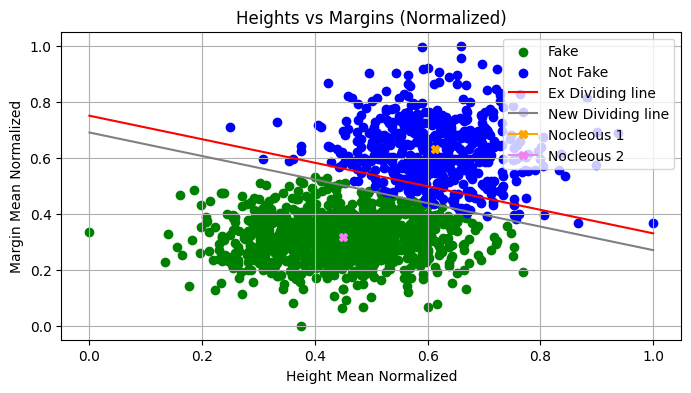

In [206]:
class_array = np.array(actual_class)
plt.figure(figsize=(8,4))
# Scatter plot with different colors for humans and non-humans
plt.scatter(mean_heights_normalized[class_array-1 == 1], mean_margins_normalized[class_array-1 == 1], color='green', label='Fake')
plt.scatter(mean_heights_normalized[class_array-1 == 0], mean_margins_normalized[class_array-1 == 0], color='blue', label='Not Fake')


# Create the line like to divide both groups
x_values = np.linspace(mean_heights_normalized.min(), mean_heights_normalized.max(), 100)
y_values = -0.42 * x_values + 0.75
plt.plot(x_values, y_values, 'r-', label='Ex Dividing line')

x_values_new = np.linspace(mean_heights_normalized.min(), mean_heights_normalized.max(), 100)
y_values_new = -0.42 * x_values + 0.69
plt.plot(x_values_new, y_values_new, color = 'grey', label='New Dividing line')

# Show the Nucleous 
plt.plot(nucleous_1[0], nucleous_1[1], color = 'orange', label='Nocleous 1', marker = 'X')
plt.plot(nucleous_2[0], nucleous_2[1], color = 'violet', label='Nocleous 2', marker = 'X')


plt.title('Heights vs Margins (Normalized)')
plt.xlabel('Height Mean Normalized')
plt.ylabel('Margin Mean Normalized')
plt.legend()
plt.grid(True)
plt.show()

# Part B) Do the Same but actually using SKlearn Library

In [1]:
import numpy as np